<p style="background: linear-gradient(to right, #4B0082, #8A2BE2); 
           font-size: 25px; 
           color: white; 
           text-align: center; 
           padding: 12px; 
           border-radius: 8px; 
           box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2); 
           font-family: 'Trebuchet MS', sans-serif;">
   Image Caption Generator
</p>


<div class="project-intro">
    <h2>Project Introduction</h2>
    <p>My project is Automatic Image Captioning, utilizing the <strong>Flickr8k_Dataset</strong> as the primary dataset. This project aims to develop an image captioning model that generates descriptive captions for images.</p>
    <p>This project explores the fusion of Inception's image feature extraction with LSTM-based text generation using GloVe embeddings. The goal is to automate the creation of descriptive captions for images, enhancing the accessibility and understanding of visual content through automated captioning.</p>
</div>
<style>
    .project-intro {
        background-color: #f7f7f7;
        border-left: 6px solid #007BFF; /* Blue left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }

    .project-intro h2 {
        color: #007BFF; /* Blue heading color */
        font-size: 28px;
        margin-bottom: 15px;
        border-bottom: 2px solid #007BFF;
        padding-bottom: 5px;
    }

    .project-intro p {
        font-size: 16px;
        line-height: 1.6;
        color: #333333;
    }

    .project-intro strong {
        color: #333333; /* Darker text color for strong elements */
    }
</style>


<div class="concept-intro">
    <h2>Introduction to Flickr8k</h2>
    <p>Flickr8k is a widely used dataset in the field of computer vision and natural language processing. It consists of 8,000 images that are each paired with five different captions, totaling 40,000 captions. This dataset serves as a benchmark for tasks such as image captioning and multimodal learning.</p>
</div>     
<div class="concept-intro">    
    <h2>Introduction to Inception V3</h2>
    <p>Inception V3 is a deep convolutional neural network architecture developed by Google. It is well-known for its performance in image recognition tasks. In image captioning, Inception V3 is often used for extracting high-level features from images, which are then used as inputs to generate descriptive captions.</p>
</div> 
<div class="concept-intro">     
    <h2>Introduction to GloVe</h2>
    <p>GloVe (Global Vectors for Word Representation) is an unsupervised learning algorithm for obtaining vector representations for words. These representations capture semantic relationships between words based on their co-occurrence statistics in large text corpora. In image captioning, GloVe embeddings are used to represent and generate meaningful text descriptions.</p>
</div>
<style>
    .concept-intro {
        background-color: #f9f9f9;
        border-left: 6px solid #FFA500; /* Orange left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }

    .concept-intro h2 {
        color: #FFA500; /* Orange heading color */
        font-size: 24px;
        margin-bottom: 15px;
        border-bottom: 2px solid #FFA500;
        padding-bottom: 5px;
    }

    .concept-intro p {
        font-size: 16px;
        line-height: 1.6;
        color: #333333;
    }
</style>


<div class="section-container">
    <h2>Loading Libraries</h2>
</div>
<style>
    .section-container {
        background
    -color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>


In [1]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import string
import os
from PIL import Image
import glob
from pickle import dump, load
from time import time
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.layers import Bidirectional
from keras.layers import add
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

<div class="section-container">
    <h2>Data First Look Using Pandas</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [2]:
file= pd.read_table('Flickr8k.token.txt')
file.head()

,1000268201_693b08cb0e.jpg#0,A child in a pink dress is climbing up a set of stairs in an entry way .
0,1000268201_693b08cb0e.jpg#1,A girl going into a wooden building .
1,1000268201_693b08cb0e.jpg#2,A little girl climbing into a wooden playhouse .
2,1000268201_693b08cb0e.jpg#3,A little girl climbing the stairs to her playh...
3,1000268201_693b08cb0e.jpg#4,A little girl in a pink dress going into a woo...
4,1001773457_577c3a7d70.jpg#0,A black dog and a spotted dog are fighting


<div class="section-container">
    <h2>Loading Data into Memory</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [3]:
#load doc in memory
def load_doc(filename):
    # open the file as read only
    file = open(filename,'r')
    # read all text
    text= file.read()
    # close the file
    file.close()
    return text
filename ="Flickr8k.token.txt"
# load descriptions
doc=load_doc(filename)
print(doc[:300])

1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg#1	A girl going into a wooden building .
1000268201_693b08cb0e.jpg#2	A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg#3	A little girl climbing the s


<div class="section-container">
    <h2>Loading Descriptions</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [4]:
def load_descriptions(doc):
    mapping= dict()
    # splits the document into lines and iterates over each line
    for line in doc.split('\n'):
        # split lines by white space
        token = line.split(' ')
        # If the line has less than two tokens (i.e., it's empty or has only the image ID), it skips to the next line.
        if len(line)<2:
            continue
        # extracts the image ID (the first token) and the image description (the rest of the tokens).
        img_id, img_des= token[0], token[1:]
        # removes the file extension from the image ID
        img_id= img_id.split('.')[0]
        # converts the image description tokens back into a single string
        img_des= ' '.join(img_des)
        #image ID is not already in the mapping dictionary, it adds it with an empty list as its value
        if img_id not in mapping:
            mapping[img_id]= list()
        # store description
        mapping[img_id].append(img_des)
    return mapping
# parse description
descriptions= load_descriptions(doc)
print('Loaded :' , len(descriptions))
        
        

Loaded : 8092


In [5]:
list(descriptions.keys())[:5]

['1000268201_693b08cb0e',
 '1001773457_577c3a7d70',
 '1002674143_1b742ab4b8',
 '1003163366_44323f5815',
 '1007129816_e794419615']

In [6]:
descriptions['1007129816_e794419615']

['man in an orange hat starring at something .',
 'man wears an orange hat and glasses .',
 'man with gauges and glasses is wearing a Blitz hat .',
 'man with glasses is wearing a beer can crocheted hat .',
 'man with pierced ears is wearing glasses and an orange hat .']

<div class="section-container">
    <h2>Now Cleaning Descriptions To Remove Puntuation</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [7]:
def clean_descriptions(descriptions):
    # prepare translation table for removing punctuation
    table= str.maketrans('','',string.punctuation)
    for key, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            desc= desc_list[i]
            # tokenize splits the description into tokens (words)
            desc= desc.split()
            #convert to lowercase
            desc= [word.lower() for word in desc]
            # remove punctuation from each token
            desc= [word.translate(table) for word in desc]
            # remove hanging 's' and 'a'
            desc= [word for word in desc if len(word)>1]
            # remove tokens with numbers in them
            desc= [word for word in desc if word.isalpha()]
            # store as sting
            desc_list[i]= ' '.join(desc)
# clean descriptions
clean_descriptions(descriptions)

In [8]:
descriptions['1007129816_e794419615']

['man in an orange hat starring at something',
 'man wears an orange hat and glasses',
 'man with gauges and glasses is wearing blitz hat',
 'man with glasses is wearing beer can crocheted hat',
 'man with pierced ears is wearing glasses and an orange hat']

<div class="section-container">
    <h2>Converting The Descriptions Into Vocaulary Of Words</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [9]:
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
    # build a list of all description strings
    all_desc = set()
    for key in descriptions.keys():
        #  splits each description into words and adds them to the all_desc set
        [all_desc.update(d.split()) for d in descriptions[key]]
    return all_desc

# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Original vocabulary size :', len(vocabulary))
    

Original vocabulary size : 8680


<div class="section-container">
    <h2>Saving Description To File</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [10]:
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
    lines= list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            # Concatenate the key and description and add it to the 'lines' list
            lines.append(key+ ' '+ desc)
        # Join all lines into a single string, separated by newline characters
    data= '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

save_descriptions(descriptions, 'descriptions.txt')
        

<div class="section-container">
    <h2>Load a pre-defined list of photo identifiers</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [11]:
# load a pre-defined list of photo identifiers
def load_set(filename):
    doc= load_doc(filename)
    dataset= list()
    # process line by line
    for line in doc.split('\n'):
        # skip empty lines
        if len(line)<1:
            continue
        # get the image identifier
        identifier= line.split('.')[0]
        dataset.append(identifier)
    return set(dataset)
filename ="Flickr_8k.trainImages.txt"
train=load_set(filename)
print('Dataset :', len(train))

        

Dataset : 6000


In [12]:
# Below path contains all the images
images= '../Automatic-Image-Captioning-master/Flicker8k_Dataset/'
# Create a list of all image names in the directory
img= glob.glob(images + '*.jpg')

<div class="section-container">
    <h2>Storing Train and Test Imgaes To List</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [13]:
# Below file conatains the names of images to be used in train data
train_image_file ="Flickr_8k.trainImages.txt"
# Read the train image names in a set
train_images= set(open(train_image_file, 'r').read().strip().split('\n'))
# Create a list of all the training images with their full path names
train_img=[]

for i in img: # img is list of full path names of all images
    if i[len(images):] in train_images:  # Check if the image belongs to training set
        train_img.append(i) # Add it to the list of train images


In [14]:
# Below file conatains the names of images to be used in test data
test_image_files= 'Flickr_8k.testImages.txt'
# Read the test image names in a set
test_images= set(open(test_image_files,'r').read().strip().split('\n'))

# Create a list of all the test images with their full path names
test_img = []

for i in img:
    if i[len(images):] in test_images:# Check if the image belongs to test set
        test_img.append(i)




<div class="section-container">
    <h2>Loading Clean Descriptions To Memory</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [15]:
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
    doc = load_doc(filename)
    descriptions= {}
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc= tokens[0],tokens[1:]
        # skip images not in the set
        if image_id in dataset:
            # create list
            if image_id not in descriptions:
                descriptions[image_id]= []
            # wrap description in tokens
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            # store
            descriptions[image_id].append(desc)
    return descriptions
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print("Descriptions :", len(train_descriptions))

Descriptions : 6000


<div class="section-container">
    <h2>Images Preprocessing</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [16]:
def preprocess(image_path):
    # Convert all the images to size as expected by the inception v3 model
    img= image.load_img(image_path, target_size= (224,224,3))
    # Convert PIL image to numpy array of 3-dimensions
    x = image.img_to_array(img)
    # Add one more dimension
    x = np.expand_dims(x, axis=0)
    # preprocess the images using preprocess_input() from inception module
    x = preprocess_input(x)
    return x

In [17]:
model = InceptionV3(weights='imagenet')

In [18]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3

# Load the inception v3 model
model = InceptionV3(weights='imagenet')

In [19]:
# Create a new model, by removing the last layer (output layer) from the inception v3
model_new = Model(model.input, model.layers[-2].output)

<div class="section-container">
    <h2>Encoding Images</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [20]:
# Function to encode a given image into a vector of size (2048, )
def encode(image):
    image= preprocess(image)
    fea_vec = model_new.predict(image) # Get the encoding vector for the image
    fec_vec = np.reshape(fea_vec, fea_vec.shape[1])  # reshape from (1, 2048) to (2048, )
    return fea_vec

In [21]:
# Call the funtion to encode all the train images - Execute this only once

#start = time()
#encoding_train = {}
#for img in train_img:
    #encoding_train[img[len(images):]] = encode(img)
#print("Time taken in seconds =", time()-start)


In [22]:
# Save the bottleneck train features to disk
#import pickle
#with open("encoded_train_images.pkl", "wb") as encoded_pickle:
 #   pickle.dump(encoding_train, encoded_pickle)

In [23]:
# Call the funtion to encode all the test images - Execute this only once

#start = time()
#encoding_test = {}
#for img in test_img:
    #encoding_test[img[len(images):]] = encode(img)
#print("Time taken in seconds =", time()-start)


In [24]:
# Save the bottleneck test features to disk
#import pickle
#with open("encoded_test_images.pkl", "wb") as encoded_pickle:
    #pickle.dump(encoding_test, encoded_pickle)

<div class="section-container">
    <h2>Loading Encoded Images</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [25]:
import pickle

# Load encoded train images from the pickle file
with open("encoded_train_images.pkl", "rb") as file:
    train_features = pickle.load(file)

# Print the number of loaded images
print('Photos: train=', len(train_features))

Photos: train= 6000


<div class="section-container">
    <h2>Captions Preprcessing</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [26]:
# Create a list of all the training captions
all_train_captions = []
for key, val in train_descriptions.items():
    for cap in val:
        all_train_captions.append(cap)
len(all_train_captions)

30000

In [27]:
# Consider only words which occur at least 10 times in the corpus
word_count_threshold = 10
word_counts = {}
nsents = 0
for sent in all_train_captions:
    nsents += 1
    for w in sent.split(' '):
        word_counts[w] = word_counts.get(w, 0) + 1

vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
print('preprocessed words %d -> %d' % (len(word_counts), len(vocab)))

preprocessed words 7506 -> 1631


<div class="section-container">
    <h2>Mapping Index</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [28]:
ixtoword = {}  # Dictionary to map index to word
wordtoix = {}  # Dictionary to map word to index

ix = 1  # Starting index for words, typically starting from 1 since 0 might be used for padding or special tokens

# Iterate through each word in the vocabulary list
for w in vocab:
    wordtoix[w] = ix  # Map the word to its corresponding index in wordtoix dictionary
    ixtoword[ix] = w  # Map the index to its corresponding word in ixtoword dictionary
    ix += 1  # Increment index for the next word, ensuring uniqueness of indices

In [29]:
vocab_size = len(ixtoword) + 1 # one for appended 0's
vocab_size

1632

In [30]:
# convert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
    all_desc= list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

# calculate the length of the description with the most words
def max_len(descriptions):
    lines= to_lines(descriptions)
    return max(len(d.split()) for d in lines)

# determine the maximum sequence length
max_length = max_len(train_descriptions)
print('Description Length: ', max_length)

Description Length:  33


<div class="section-container">
    <h2>Data Generator Function For Model Training</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [31]:
def data_generator(descriptions, photos, wordtoix, max_length, num_photos_per_batch, vocab_size):
    X1, X2, y = list(), list(), list()
    n = 0  # Initialize a counter for the number of processed images
    # Loop indefinitely over images
    while 1:
        for key, desc_list in descriptions.items():
            n = n + 1
            photo = photos[key + '.jpg']  # Retrieve the photo feature corresponding to the image key
            photo = np.reshape(photo, (photo.shape[0], -1))

            for desc in desc_list:
                # Encode the sequence by converting words to their indices if they exist in wordtoix
                seq = [wordtoix[word] for word in desc.split(' ') if word in wordtoix]
                # split one sequence into multiple X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pair
                    in_seq, out_seq = seq[:i], seq[i]  # from index 0 up to (but not including) index i
                    # pads input sequence to ensure that it has a fixed length
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # function call converts the out_seq value into a one-hot encoded vector
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    # store
                    X1.append(photo)
                    X2.append(in_seq)
                    y.append(out_seq)
            # yield the batch data
            # yield is a keyword used in generator functions to return a value to the caller without exiting the function entirely
            if n == num_photos_per_batch:
                yield [[np.array(X1), np.array(X2)], np.array(y)]
                X1, X2, y = list(), list(), list()
                n = 0


<div class="section-container">
    <h2>Loading Glove Vectors</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [32]:
# Load Glove vectors
glove_dir = '../Automatic-Image-Captioning-master/glove/'
embeddings_index = {} # empty dictionary
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding="utf-8")# construct path to file by joining directory and filename

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [33]:
embedding_dim = 200

# Get 200-dim dense vector for each of the 10000 words in out vocabulary
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in wordtoix.items():
    #if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in the embedding index will be all zeros
        embedding_matrix[i] = embedding_vector

In [34]:
embedding_matrix.shape

(1632, 200)

<div class="section-container">
    <h2>Model Building</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

In [35]:
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)

In [36]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 33)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 33, 200)      326400      ['input_4[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_3[0][0]']                
                                                                                            

In [37]:
model.layers[2]

In [38]:
# weights for the embedding layer in your model and then freeze those weights so they won't be updated during training
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'],run_eagerly=True)

In [40]:
# parameters for training
epochs = 3
number_pics_per_bath = 3
steps = len(train_descriptions)//number_pics_per_bath

In [41]:
train_features_reshaped = {key: np.squeeze(value, axis=0) for key, value in train_features.items()}


In [42]:
model.optimizer.lr = 0.0001
epochs = 10
number_pics_per_bath = 6
steps = len(train_descriptions)//number_pics_per_bath

<div class="section-container">
    <h2>Model Training</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

### Done Training On Colab Using Tpu

In [ ]:
generator = data_generator(train_descriptions, train_features_reshaped, wordtoix, max_length, number_pics_per_bath, vocab_size)
for i in range(epochs):
    model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)

In [44]:
from tensorflow.keras.models import load_model

model.load_weights('latest_model5.h5')  # Specify the path to your model.h5 file

In [45]:
images = './Flickr_Data/'

In [46]:
with open("encoded_test_images.pkl", "rb") as encoded_pickle:
    encoding_test = load(encoded_pickle)

<div class="section-container">
    <h2>Function for greedy search to generate a caption</h2>
</div>
<style>
    .section-container {
        background-color: #f0f0f0;
        border-left: 6px solid #4CAF50; /* Green left border */
        padding: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        border-radius: 5px;
    }
    
    .section-container h2 {
        color: #333333;
        font-size: 24px;
        margin-bottom: 10px;
        border-bottom: 2px solid #4CAF50;
        padding-bottom: 5px;
    }
</style>

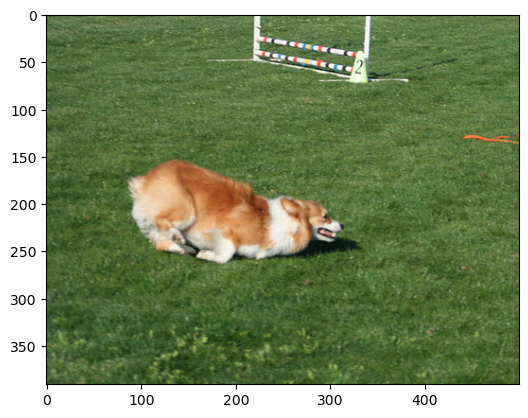

Greedy: dog is running through the grass


In [69]:
# Function for greedy search to generate a caption
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

# Ensure z is within the bounds of encoding_test
z +=10
if z >= len(encoding_test):
    z = 0  # Reset z if it exceeds the number of test encodings

pic = list(encoding_test.keys())[z]
image = encoding_test[pic].reshape((1, 2048))

x = plt.imread(images + pic)
plt.imshow(x)
plt.show()

print("Greedy:", greedySearch(image))
